# Pymaceuticals Inc.
You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.

------------------------------------------

### Analysis
The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Key Observations 
1. Tumor Volume Summary by Regimen (Sumamry Statistics)
    * Capomulin (Mean: 40.68, Median: 41.56) and Ramicane (Mean: 40.22, Median: 40.67) appear to be the most effective regimen in reducing tumor volume as it shows the lowest average and median (middle number) tumor volumes. Suggesting both regimens have a similar effectiveness in reducing tumor volume. 
    * Capomulin (Variance: 24.95, Std: 4.99) and Ramicane (Variance: 23.49, Std: 4.85) shows a low variance, where the data points are close to the mean (average), indicating that the regimens produce consistant and reliable and a low standard deviation indidationg the data is clustered closely by the mean, meaning more reliable and consistant results. 
    * Other regimens such as Ceftamin (Mean: 52.59), Infubinol (Mean: 52.88), and Ketapril (Mean: 55.24), have higher mean tumor volumes, suggesting they are less effective in reducing tumor size. 

2. (#) of Obseved Mouse Timepoints by Regimen (Bar Chart)
    * Capomulin (230) and Ramicane (228) had the highest number of observed mouse timepoints.
    * The other treatment regimens had lower number of timpoints, less than 200, with Propriva at the lowest at 148 observations. 
    * This high level of observation suggests that Capomulin and Ramicane were more thoroughly studied, possibly due to consistent data collection for the two treatment regimens.

3. Gender Distribution (Pie Chart)
    * The gender distribution in the pie chat is nearly evenly split, with 50.4% males and 49.6% females. This suggests that both genders are close to being equally represneted in the study. 

4. Correlation Between Weight and Average Tumor Volume (Correlation and Regression)
    * The scatter plot illustrates a positive correlation between mouse weight and the average tumor volume, suggesting that heavier mice tend to have larger tumors. 
    * Using Pearson's Correlation Coefficient, the absolute value of r = 0.84 represents a strong positive correlcation. This indicates a strong linear relationship between mouse weight and average tumor volume thst suggests that as weight increases the average tumor volume also tends to increase. 
    * The linear regression line illustrates a relationship between weight and tumor size. The slope of the regression line confirms that tumor volume tends to increase with weight. The spread around the line suggests that other variables outside of weight may influence the tumor volume. 
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
#mouse_metadata_df
#study_results_df

# Combine the data into a single DataFrame
complete_data_df = pd.merge(study_results_df, mouse_metadata_df, on= "Mouse ID", how ="left")

# Display the data table for preview
complete_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.

#extract column "Mouse ID" from clean_data_df and count the # of distinct ID's in that column 
number_of_mice = complete_data_df["Mouse ID"].nunique()
#number_of_mice =len(complete_data_df["Mouse ID"].value_counts())
number_of_mice

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#looks at columns "Mouse ID" AND "Timepoint" in complete_data_df for duplicate row entries and returns array of the unique "Mouse ID"
duplicate_mice = complete_data_df[complete_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID.

#looks at complete_data_df where only rows in column "Mouse ID" are equal to "g989"
no_duplicate_mice_df = complete_data_df[complete_data_df["Mouse ID"] == "g989"]
no_duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#looks at complete_data_df where only rows in column "Mouse ID" are no equal to "g989"
clean_data_df = complete_data_df[complete_data_df["Mouse ID"] != "g989"]

#clean_data_df.dtypes
clean_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.

#extract column "Mouse ID" from clean_data_df and count the # of distinct ID's in that column 
clean_number_of_mice = clean_data_df["Mouse ID"].nunique()
clean_number_of_mice

248

## Summary Statistics

In [31]:
'''# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.'''


#calcualte mean, median, var, std, sem using groupby
mean_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#create DataFrame using results from the above calculations 
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                    "Median Tumor Volume": median_tumor_volume,
                                    "Tumor Volume Variance": tumor_volume_variance,
                                    "Tumor Volume Std. Dev.": tumor_volume_std,
                                    "Tumor Volume Std. Err.": tumor_volume_std_err})


summary_stats_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
'''# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line'''

#groups clean_data_df by column "Drug Regimen" and then looks at the column "Tumor Volume (mm3)" within each group and aggregates the calculations for each
summary_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

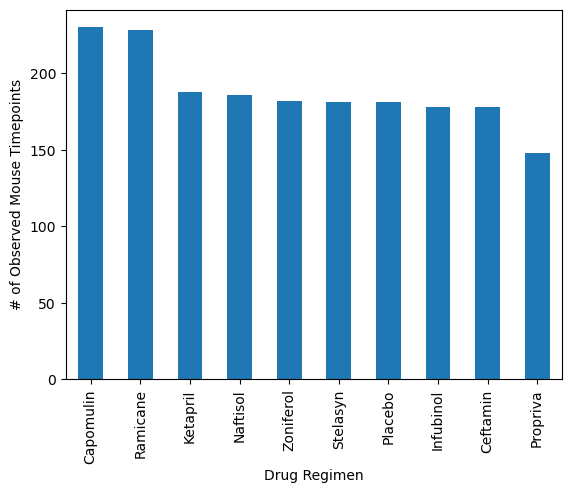

In [33]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. 

'''   ###PANDAS -- bar plot###    '''

        ###FROM A SERIES###
# mouse_count = clean_data_df["Drug Regimen"].value_counts() 
# mouse_count
# # mouse_count_df = pd.DataFrame(mouse_count).reset_index()
# # #mouse_count_df
# # mouse_count_df.columns = ["Drug Regimen", "# of Observed Mouse Timepoints"]
# # mouse_count_df.plot.bar(x="Drug Regimen", y="# of Observed Mouse Timepoints")
# # plt.show()



        ###FROM A DATAFRAME###
drug_regimen_df = clean_data_df[["Drug Regimen", "Timepoint"]]
#drug_regimen_df
mouse_count = drug_regimen_df["Drug Regimen"].value_counts()
#mouse_count
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df.columns = ["Drug Regimen", "# of Observed Mouse Timepoints"]
mouse_count_df
pd_bar_plot = mouse_count_df.plot(x="Drug Regimen", y="# of Observed Mouse Timepoints", kind="bar", legend=False)
pd_bar_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


In [34]:
#chart # of Obseved Mouse Timepoints by Regimen
mouse_count_df

,Drug Regimen,# of Observed Mouse Timepoints
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


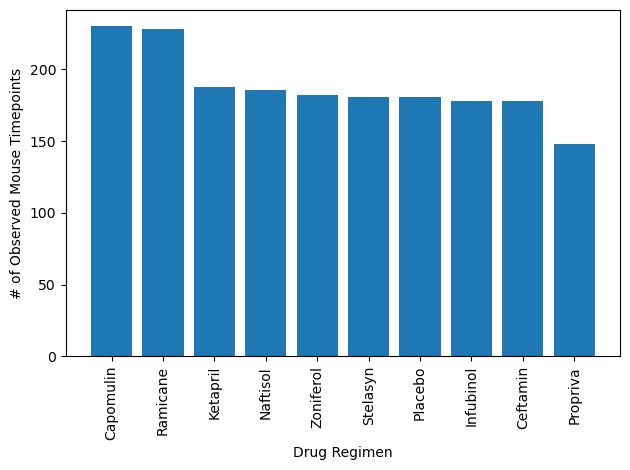

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot. 

'''    ##########   PYPLOT -- bar plot  '''

        ###FROM A SERIES###
# #counts the number of rows for "Drug Regimen" 
# mouse_count = clean_data_df["Drug Regimen"].value_counts() 
# #mouse_count
# plt.bar(mouse_count.index, mouse_count.values, align="center")
# plt.xlabel("Drug Regimen")
# plt.ylabel("# of Observed Mouse Timepoints")
# plt.xticks(rotation = "vertical")
# plt.show()


        ###FROM A DATAFRAME###
mouse_count = clean_data_df["Drug Regimen"].value_counts() 
#mouse_count
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df.columns = ["Drug Regimen", "# of Observed Mouse Timepoints"]
#mouse_count_df
plt.bar(mouse_count_df["Drug Regimen"], mouse_count_df["# of Observed Mouse Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.tight_layout()
plt.show()


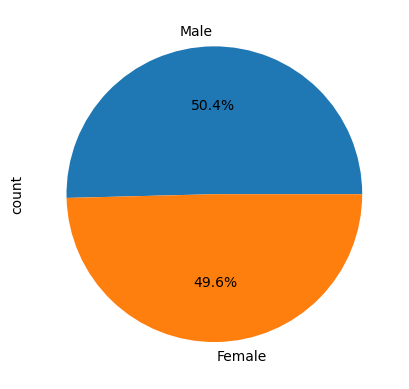

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study -- df.plot(kind = pie)

'''   ##########   PANDAS -- pie chart  '''

        ###FROM A SERIES###
# #Get the unique mice with their gender
# unique_mice_gender_df = clean_data_df[["Mouse ID", "Sex"]].drop_duplicates()
# # unique_mice_gender_df
# gender_count = unique_mice_gender_df["Sex"].value_counts()
# #gender_count

# # # Make the pie chart
# gender_count.plot(kind="pie", autopct="%1.1f%%")
# plt.show()

        ###FROM A DATAFRAME###
# Get the unique mice with their gender
unique_mice_gender_df = clean_data_df[["Mouse ID", "Sex"]].drop_duplicates()
# unique_mice_gender_df
gender_count = unique_mice_gender_df["Sex"].value_counts()
#gender_count
gender_count_df = pd.DataFrame(gender_count)
#gender_count_df

# Make the pie chart
gender_count_df["count"].plot(kind="pie",autopct="%1.1f%%") 
plt.show()




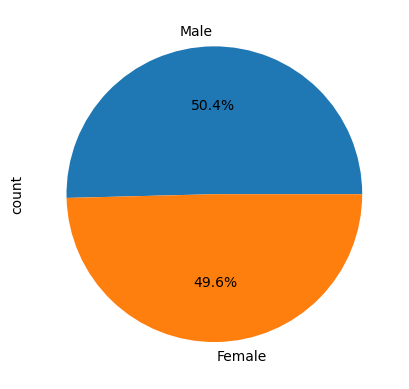

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

''' ##########   PYPLOT -- pie chart    '''


        ###FROM A SERIES###
# # Get the unique mice with their gender
# unique_mice_gender = clean_data_df[["Mouse ID", "Sex"]].drop_duplicates()
# #unique_mice_gender

# gender_count = unique_mice_gender["Sex"].value_counts()
# gender_count

# # Make the pie chart
# plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%')
# plt.show()


        ###FROM A DATAFRAME###
# Get the unique mice with their gender
unique_mice_gender = clean_data_df[["Mouse ID", "Sex"]].drop_duplicates()
#unique_mice_gender

gender_count = unique_mice_gender["Sex"].value_counts()
gender_count

gender_count_df = pd.DataFrame(gender_count).reset_index()
gender_count_df
# Make the pie chart
plt.pie(gender_count_df["count"], labels=gender_count_df["Sex"], autopct='%1.1f%%')
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#groups clean_data_df by "Mouse ID" and finds the max value in the "Timepoint" column  
greatest_tp = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
#greatest_tp

#resets the greatest_tp from a Series to a DataFrame
greatest_tp_reset = greatest_tp.reset_index() 
#greatest_tp_reset

greatest_tp_df = pd.DataFrame(greatest_tp)
#greatest_tp_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_df = greatest_tp_df.merge(clean_data_df, how= "left", on = ["Mouse ID","Timepoint"])
last_tp_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


#empty list to store the tumor volume
tumor_vol_data = []
#placeholder to store tumor volumes for specific regimens 
total_tumor_vol = 0
#stores outlieres for specific treatments
all_outliers = []
 
# Locate the rows which contain mice on each drug and get the tumor volumes    
for treatment in treatments:
    #filters data frame to match each treatment in loop then selects the tumor volumne  
    total_tumor_vol = last_tp_df.loc[last_tp_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    #print(tumor_vol_data)
    
    # add subset
    #for each loop, total_tumor_vol stores the the tumor volume data and appends data to the tumor_vol_data list
    tumor_vol_data.append(total_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Determine outliers using upper and lower bounds
    #calculates the quartiles referencing the total_tumor_vol 
    quartiles = total_tumor_vol.quantile([0.25, 0.5, 0.75])
    #print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = total_tumor_vol.loc[(total_tumor_vol < lower_bound) | (total_tumor_vol > upper_bound)]
   
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [40]:
#look at summary to align with boxplot created 
tumor_vol_data_df = pd.DataFrame(tumor_vol_data, treatments).T
tumor_vol_data_df.describe()

,Capomulin,Ramicane,Infubinol,Ceftamin
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,36.191390,58.178246,57.753977
std,5.715188,5.671539,8.602957,8.365568
min,23.343598,22.050126,36.321346,45.000000
25%,32.377357,31.560470,54.048608,48.722078
50%,38.125164,36.561652,60.165180,59.851956
75%,40.159220,40.659006,65.525743,64.299830
max,47.685963,45.220869,72.226731,68.923185


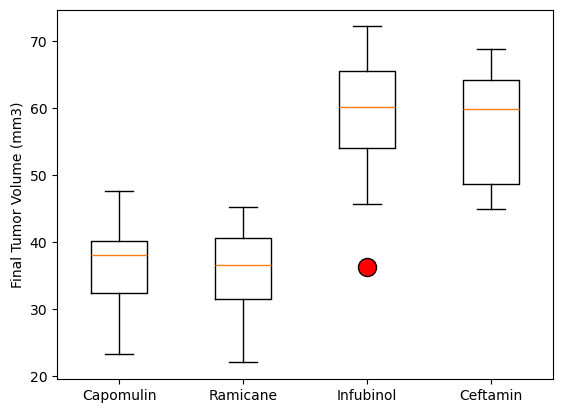

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


        ###FROM A SERIES###
#tumor_vol_data

#create a box plot using tumor_vol_data to plot and assign labels, customize outliers to a red dot at 13 size 
#plt.boxplot(tumor_vol_data, labels=treatments , flierprops=dict(markerfacecolor = "red",markersize=13))
plt.boxplot(tumor_vol_data, tick_labels=treatments, flierprops=dict(markerfacecolor="red", markersize=13))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


        ###FROM A DATAFRAME###
#tumor_vol_data
#.T transposes the columns to rows
# tumor_vol_data_df = pd.DataFrame(tumor_vol_data).T
# tumor_vol_data_df
# tumor_vol_data_df.columns = treatments
# tumor_vol_data_df.boxplot(flierprops=dict(markerfacecolor = "red",markersize=13))
# plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
# plt.grid(False)
# plt.ylabel("Final Tumor Volume (mm3)")
# plt.boxplot(tumor_vol_data, labels=treatments , flierprops=dict(markerfacecolor = "red",markersize=14))
# plt.ylabel("Final Tumor Volume (mm3)")
# plt.show()


## Line and Scatter Plots

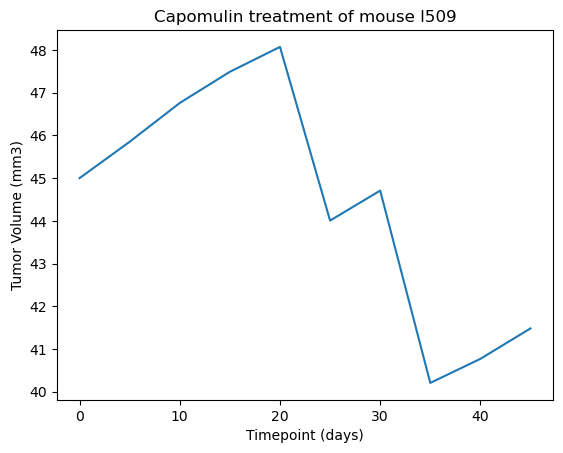

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#filter clean_data_df to show rows that contain "Capomulin" in the "Drug Regimen" column 
capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]
#capomulin_df
#filter capomulin_df to show rows that contain "l509" in the "Mouse ID" column
mouse_l509_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "l509"]
#mouse_l509_df
#on the mouse_l509_df, plot the timepoint column on the x axis and the tumor volume column on the y axis 
plt.plot(mouse_l509_df["Timepoint"],mouse_l509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

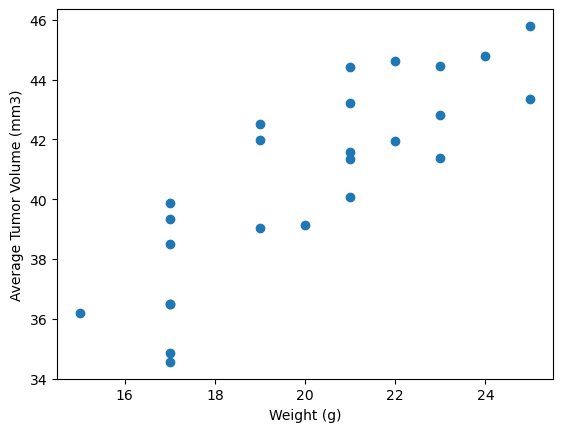

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


capomulin_df= clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]
#capomulin_df

#calculate mouse average of mouse weight and tumor volume 
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_mouse_wt = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
#avg_mouse_wt

#create a dataframe using the avgs that was just calculated 
wt_avg_tumor_vol_pd = pd.DataFrame({"Weight (g)": avg_mouse_wt,
                                    "Average Tumor Volume (mm3)": avg_tumor_vol})

#create scatter plot 
plt.scatter(wt_avg_tumor_vol_pd["Weight (g)"], wt_avg_tumor_vol_pd["Average Tumor Volume (mm3)"])

#add labels 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show plot 
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


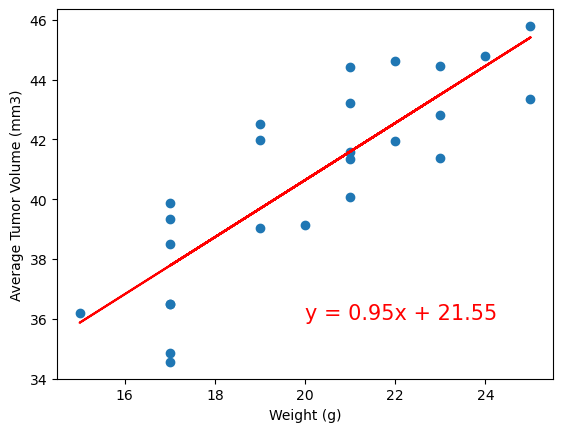

In [44]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#define x and y values
x_values = wt_avg_tumor_vol_pd["Weight (g)"]
y_values = wt_avg_tumor_vol_pd["Average Tumor Volume (mm3)"]
#linear regression using linregress function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#calculate y values for regression line
regress_values = x_values * slope + intercept

#equation of the regression line as a string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot 
plt.scatter(x_values,y_values)

#plot x_values and regress_values and the regression line in red
plt.plot(x_values, regress_values, "r-")

#adds the line_eq string as a text annotation to the plot 
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()